<a href="https://colab.research.google.com/github/mishragauravgm/sentimentanalysis_binary/blob/master/sentimentAnalysis_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import tensorflow as tf
tf.enable_eager_execution()


print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
#print("Hub version: ", hub.__version__)
print("GPU available ", tf.test.is_gpu_available())


Version:  1.14.0
Eager mode:  True
GPU available  True


In [0]:
# Other Imports
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Using TFDS to load a dataset, this will be loaded as iterables, stored as tf.Tensor


imdb_reviews, info = tfds.load("imdb_reviews",with_info=True,as_supervised=True)

In [4]:
#Will try later

'''
train_split = (
    tfds.Split.TEST.subsplit(tfds.percent[:60]) + tfds.Split.TRAIN
)


test_split = (
    tfds.Split.TEST.subsplit(tfds.percent[61:])
)

train = tfds.load("imdb_reviews",split=train_split,as_supervised=True)

train_examples_batch, train_labels_batch = next(iter(train.batch(10)))
train_examples_batch


'''

'\ntrain_split = (\n    tfds.Split.TEST.subsplit(tfds.percent[:60]) + tfds.Split.TRAIN\n)\n\n\ntest_split = (\n    tfds.Split.TEST.subsplit(tfds.percent[61:])\n)\n\ntrain = tfds.load("imdb_reviews",split=train_split,as_supervised=True)\n\ntrain_examples_batch, train_labels_batch = next(iter(train.batch(10)))\ntrain_examples_batch\n\n\n'

In [0]:
train_data, test_data = imdb_reviews['train'],imdb_reviews['test']
#We will use the following 4 lists to extract reviews and labels from the TFDS data format
train_reviews = []
test_reviews = []
train_labels = []
test_labels = []

#Iterating through the tfds data

for reviews,labels in train_data:
  train_reviews.append(str(reviews.numpy()))
  train_labels.append(labels.numpy())

for reviews,labels in test_data:
  test_reviews.append(str(reviews.numpy()))
  test_labels.append(labels.numpy())
  

In [43]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

#let's look at a few reviews and their labels

idx = np.random.randint(0,25000,size=5)

[print('From Training\n', train_reviews[i],'\n', train_labels[i]) for i in idx]


idx = np.random.randint(0,25000,size=5)

[print('From test set\n', train_reviews[i],'\n', train_labels[i]) for i in idx]

#Counting number of training and test examples

print(f'\n Number of training examples {len(train_labels)} \n Number of testing examples {len(test_labels)}')

print(f'\n Number of Positive reviews in: \n \t Train Set {len(train_labels[train_labels==1])} \n \t Test Set {len(test_labels[test_labels==1])}')

print(f'\n Number of Negative reviews in: \n \t Train Set {len(train_labels[train_labels==0])} \n \t Test Set {len(test_labels[test_labels==0])}')

From Training
 b'I went into this film expecting it to be similar to The Matrix or Pi. Boy, was I wrong. Yes, there is a poorly written, poorly acted plot in the movie (with CG animated cells and peptides to boot). However, the real focus of the film are the "expert" talking heads spewing out new age feel-good hogwash in between plot segments.<br /><br />Sure, it stars off innocently enough. There is a little bit of real quantum physics in the beginning. It states, for example, that electrons exist as both particle and wave, and that an atom is mostly empty space. However, the movie takes a giant (and unscientific) leap, saying that sub-atomic quantum effects happen on large scales as well. The talking heads take it even further. According to them, the following are true:<br /><br />-When Columbus arrived in the Caribbean, the natives were unable to see his ships because their minds were incapable of perceiving something so different. -Meditation can reduce the murder rate. -With posit

In [0]:
VOCAB_SIZE = 10000
EMBEDDING_DIM = 32
MAX_LEN = 120
TRUN_TYPE = 'post'
OOV_TOKEN = '<oov>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = VOCAB_SIZE, oov_token = OOV_TOKEN)
tokenizer.fit_on_texts(train_reviews)

word_indices = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_reviews)
train_padded_sequences = pad_sequences(train_sequences, maxlen = MAX_LEN, truncating = TRUN_TYPE)

test_sequences = tokenizer.texts_to_sequences(test_reviews)
test_padded_sequences = pad_sequences(test_sequences, maxlen=MAX_LEN, truncating = TRUN_TYPE)

In [45]:
NUM_EPOCHS = 15
LOSS = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']

model = tf.keras.Sequential([
   tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(5,activation='relu'),
   tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss=LOSS ,optimizer=OPTIMIZER,metrics=METRICS);
print(model.summary())

history = model.fit(train_padded_sequences, train_labels, epochs=NUM_EPOCHS, validation_data = (test_padded_sequences,test_labels))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
flatten_7 (Flatten)          (None, 3840)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 19205     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 339,211
Trainable params: 339,211
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 10s 420us/sample - loss: 0.4867 - acc: 0.7496 - val_loss: 0.3885 - val_acc: 0.8240
Epoch 2/15
25000/25000 [==========================

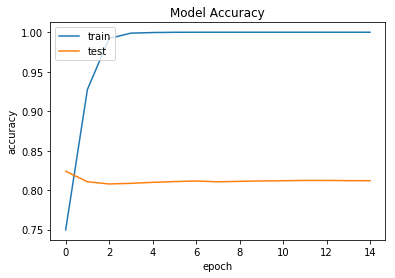

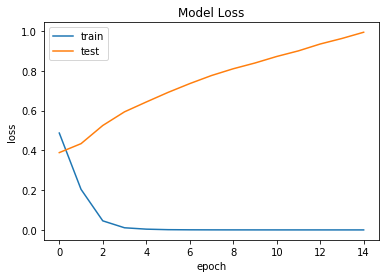

"\nfrom google.colab import files\n\nfiles.download('Accuracy_plot.png')\nfiles.download('loss_plot.png')"

In [53]:
history.history.keys()

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Accuracy_plot.png',dpi=100)

plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_plot.png',dpi=100)
plt.show()
'''
from google.colab import files

files.download('Accuracy_plot.png')
files.download('loss_plot.png')'''

In order to study embeddings more, we are reversing the dictionary, word_indices has word as key and token as value, we will reverse this dictionary

In [47]:
reverse_word_indices = dict([(token,word) for (word,token) in word_indices.items()])

def get_review_back(tokenized_text):
  return ' '.join([reverse_word_indices.get(i,'**') for i in tokenized_text]); #Gets the value from dict and joins to form a sentence


#Just checking a few of those conversions
print(get_review_back(train_padded_sequences[0])) #Notice how the length has been set to 120 only, so the length is truncated from the end
print(train_reviews[0])
      

b as a <oov> fan of dickens i have <oov> been disappointed by adaptations of his novels br br although his works presented an extremely accurate re telling of human life at every level in victorian britain throughout them all was a <oov> thread of humour that could be both playful or sarcastic as the narrative <oov> in a way he was a literary <oov> and <oov> he could be serious and hilarious in the same sentence he <oov> pride <oov> arrogance celebrated modesty and <oov> with loneliness and poverty it may be a clich xc3 xa9 but he was a people's writer br br and it is the comedy that is so often missing from his interpretations at the
b"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he wa

Afer forming the helper function above we will now create two tsv (vector) files in order to visualise the embeddings. The vectos.tsv file will have details of each word as a vector whereas metadata.tsv will have that particular word against which embedding has been done.


In [51]:
embedding_layer = model.layers[0]

weights = embedding_layer.get_weights()[0]
print(weights.shape)


import io

vector_output = io.open('vectors.tsv','w', encoding = 'utf-8')
meta_output = io.open('metadata.tsv','w',encoding = 'utf-8')

for word_token in range(1, VOCAB_SIZE):
  word = reverse_word_indices[word_token]
  embeddings = weights[word_token]
  meta_output.write(word+'\n');
  vector_output.write('\t'.join([str(x) for x in embeddings])+"\n");
  
vector_output.close()
meta_output.close()

from google.colab import files

files.download('vectors.tsv')
files.download('metadata.tsv')

(10000, 32)
